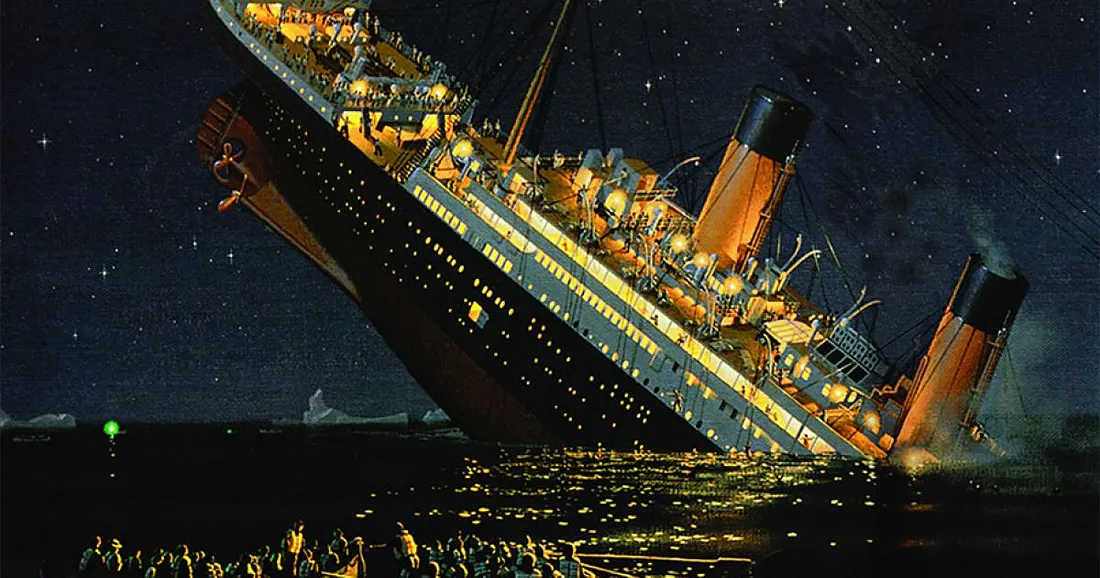

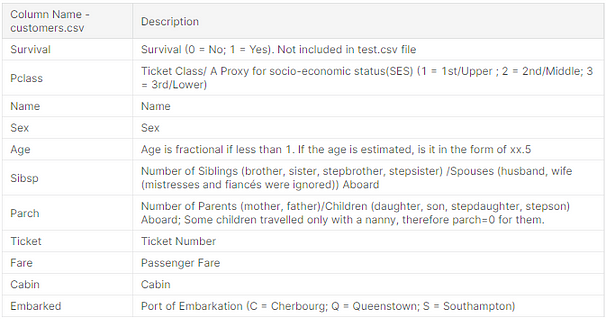

# Import Libraries

In [25]:
#type your code here 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Loading data in pandas

In [26]:
#type your code here 
df= pd.read_csv("Titanic_DS.csv")

# EDA
* .head()
* .tail()
* .info()
* .describe()

In [27]:
#type your code here 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
904,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S
905,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
906,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
907,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
908,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  909 non-null    int64  
 1   Survived     909 non-null    int64  
 2   Pclass       909 non-null    int64  
 3   Name         909 non-null    object 
 4   Sex          909 non-null    object 
 5   Age          731 non-null    float64
 6   SibSp        909 non-null    int64  
 7   Parch        909 non-null    int64  
 8   Ticket       909 non-null    object 
 9   Fare         909 non-null    float64
 10  Cabin        208 non-null    object 
 11  Embarked     907 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 85.3+ KB


In [30]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,909.000000,909.000000,909.000000,731.000000,909.000000,909.000000,909.000000
mean,437.556656,0.386139,2.310231,29.632244,0.525853,0.387239,32.023170
std,261.636573,0.487131,0.835946,14.654113,1.097977,0.818086,49.282075
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,210.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,437.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.458300
75%,664.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,909,909,909,208,907
unique,891,2,681,147,3
top,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",male,347082,G6,S
freq,3,585,8,6,658


In [32]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Check the max and min Age based on the Sex "male / female" hint.. use groupby() 

In [33]:
#type your code here 
g=df.groupby("Sex")["Age"].agg(["min","max"])
g

,min,max
Sex,,
female,0.75,63.0
male,0.42,80.0


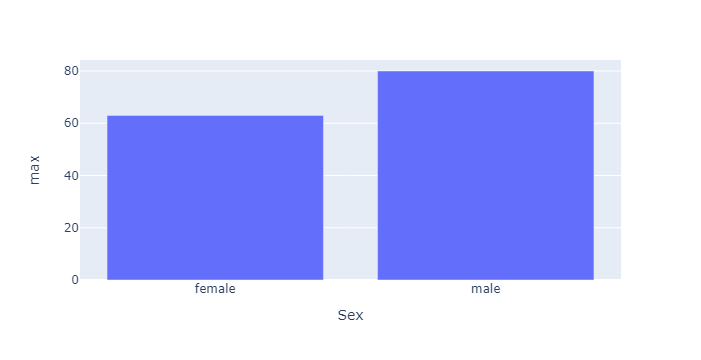

In [34]:
px.bar(g , x= g.index, y= "max")

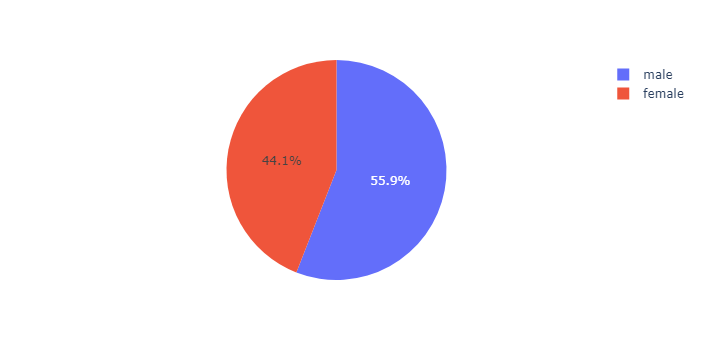

In [35]:
px.pie(g , values="max",names=g.index)

# Dropping Columns which are not usefull

Lets try to drop some of the columns which many not contribute much to our machine learning model such as Name, Ticket, Cabin

In [48]:
#type your code here 
try:
    df.drop(columns=["Name","Ticket","Cabin"], inplace=True)
except Exception as e :
    print("Error: ", e)

Error:  "['Name', 'Ticket', 'Cabin'] not found in axis"


# Check the Missing Values

In [47]:
#type your code here 
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            178
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

# How to handle the Missing Values 

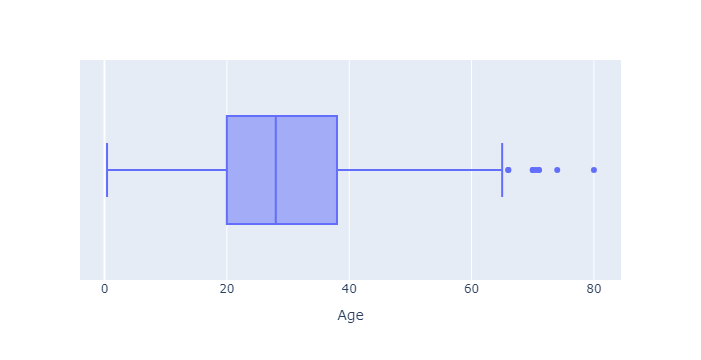

In [49]:
#type your code here 
px.box(df, x="Age")  ##to know if we have outliers , will use medien to fill missing values

In [57]:
df["Age"].median()
#df["Age"].describe()["50%"]
#df["Age"].quantile(0.5)
df["Age"]=df["Age"].fillna(df["Age"].median())

In [61]:
df["Age"].isna().sum()

0

# Check the Duplicated Rows 

In [62]:
#type your code here 
df.duplicated().sum()

18

In [63]:
df["Embarked"].value_counts()

Embarked
S    658
C    172
Q     77
Name: count, dtype: int64

In [69]:
#df["Embarked"].mode().values
df["Embarked"].mode()[0] 
df["Embarked"]= df["Embarked"].fillna( df["Embarked"].mode()[0] )


In [70]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# How to handle the duplicated rows 

In [71]:
#type your code here 
df.drop_duplicates(inplace= True)

In [72]:
df.duplicated().sum()

0

# Visualize the count of each value in Sex col

In [76]:
#type your code here
v=df["Sex"].value_counts().values
v

array([577, 314], dtype=int64)

In [79]:
index=df["Sex"].value_counts().index
index

Index(['male', 'female'], dtype='object', name='Sex')

<BarContainer object of 2 artists>

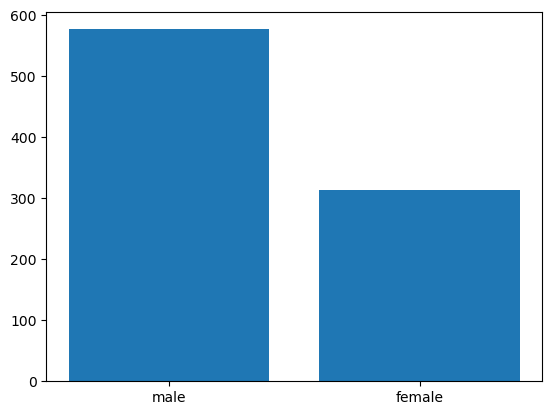

In [80]:
plt.bar(index , v)

<Axes: xlabel='Sex', ylabel='count'>

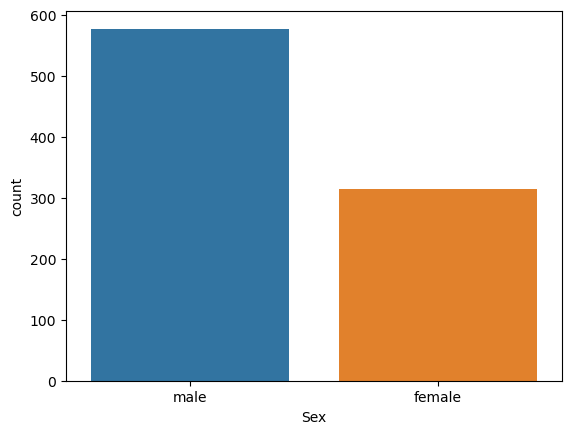

In [81]:
sns.countplot(data=df, x="Sex")

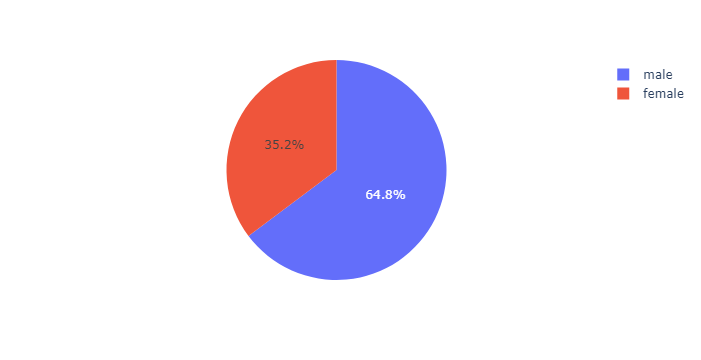

In [82]:
px.pie(values=v , names=index)

# Replace 0 with No and 1 with Yes in Survived col 

In [84]:
#type your code here
# df["Survived"].replace({0: "No" , 1: "Yes"})
df["Survived"].replace({0: "No" , 1: "Yes"}, inplace=True)
df["Survived"]

0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
886     No
887    Yes
888     No
889    Yes
890     No
Name: Survived, Length: 891, dtype: object

# Visualize the count of each value in Survived col

<Axes: xlabel='Survived', ylabel='count'>

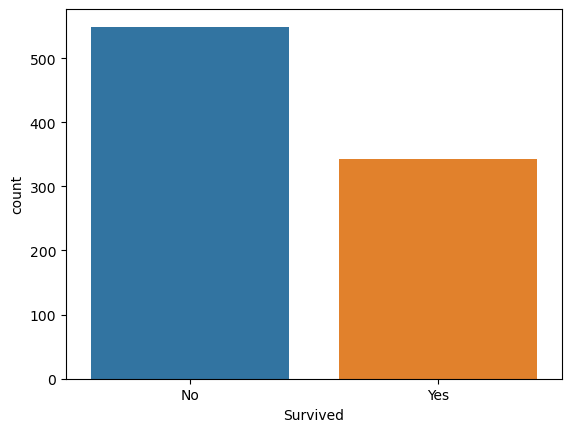

In [85]:
#type your code here
sns.countplot(data=df, x="Survived")

# Visualize the distribution of the Age col
histplot, boxplot

C:\Users\egypt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Age', ylabel='Count'>

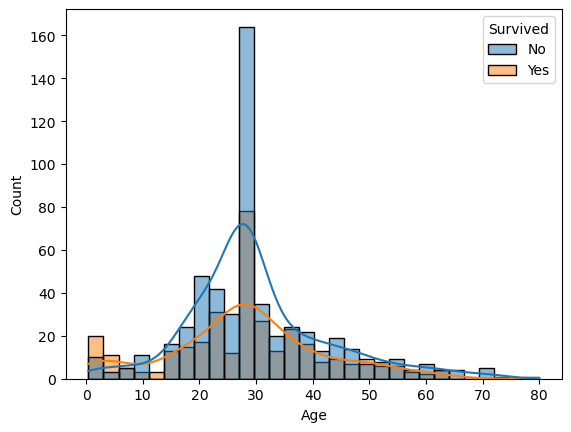

In [89]:
#type your code here 
sns.histplot(data=df, x="Age" , kde=True, hue="Survived")

<Axes: xlabel='Age'>

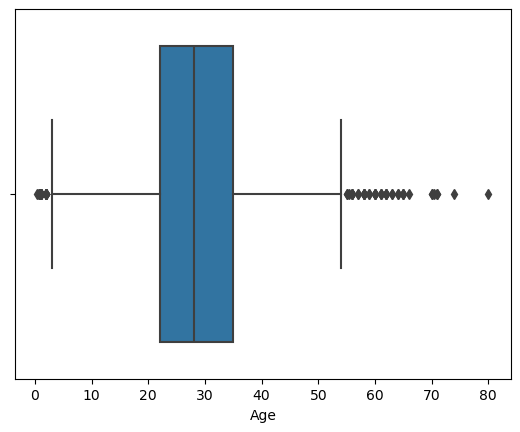

In [87]:
sns.boxplot(data=df, x="Age")

# If you can use other charts you can add them

C:\Users\egypt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\egypt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\egypt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\egypt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\egypt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

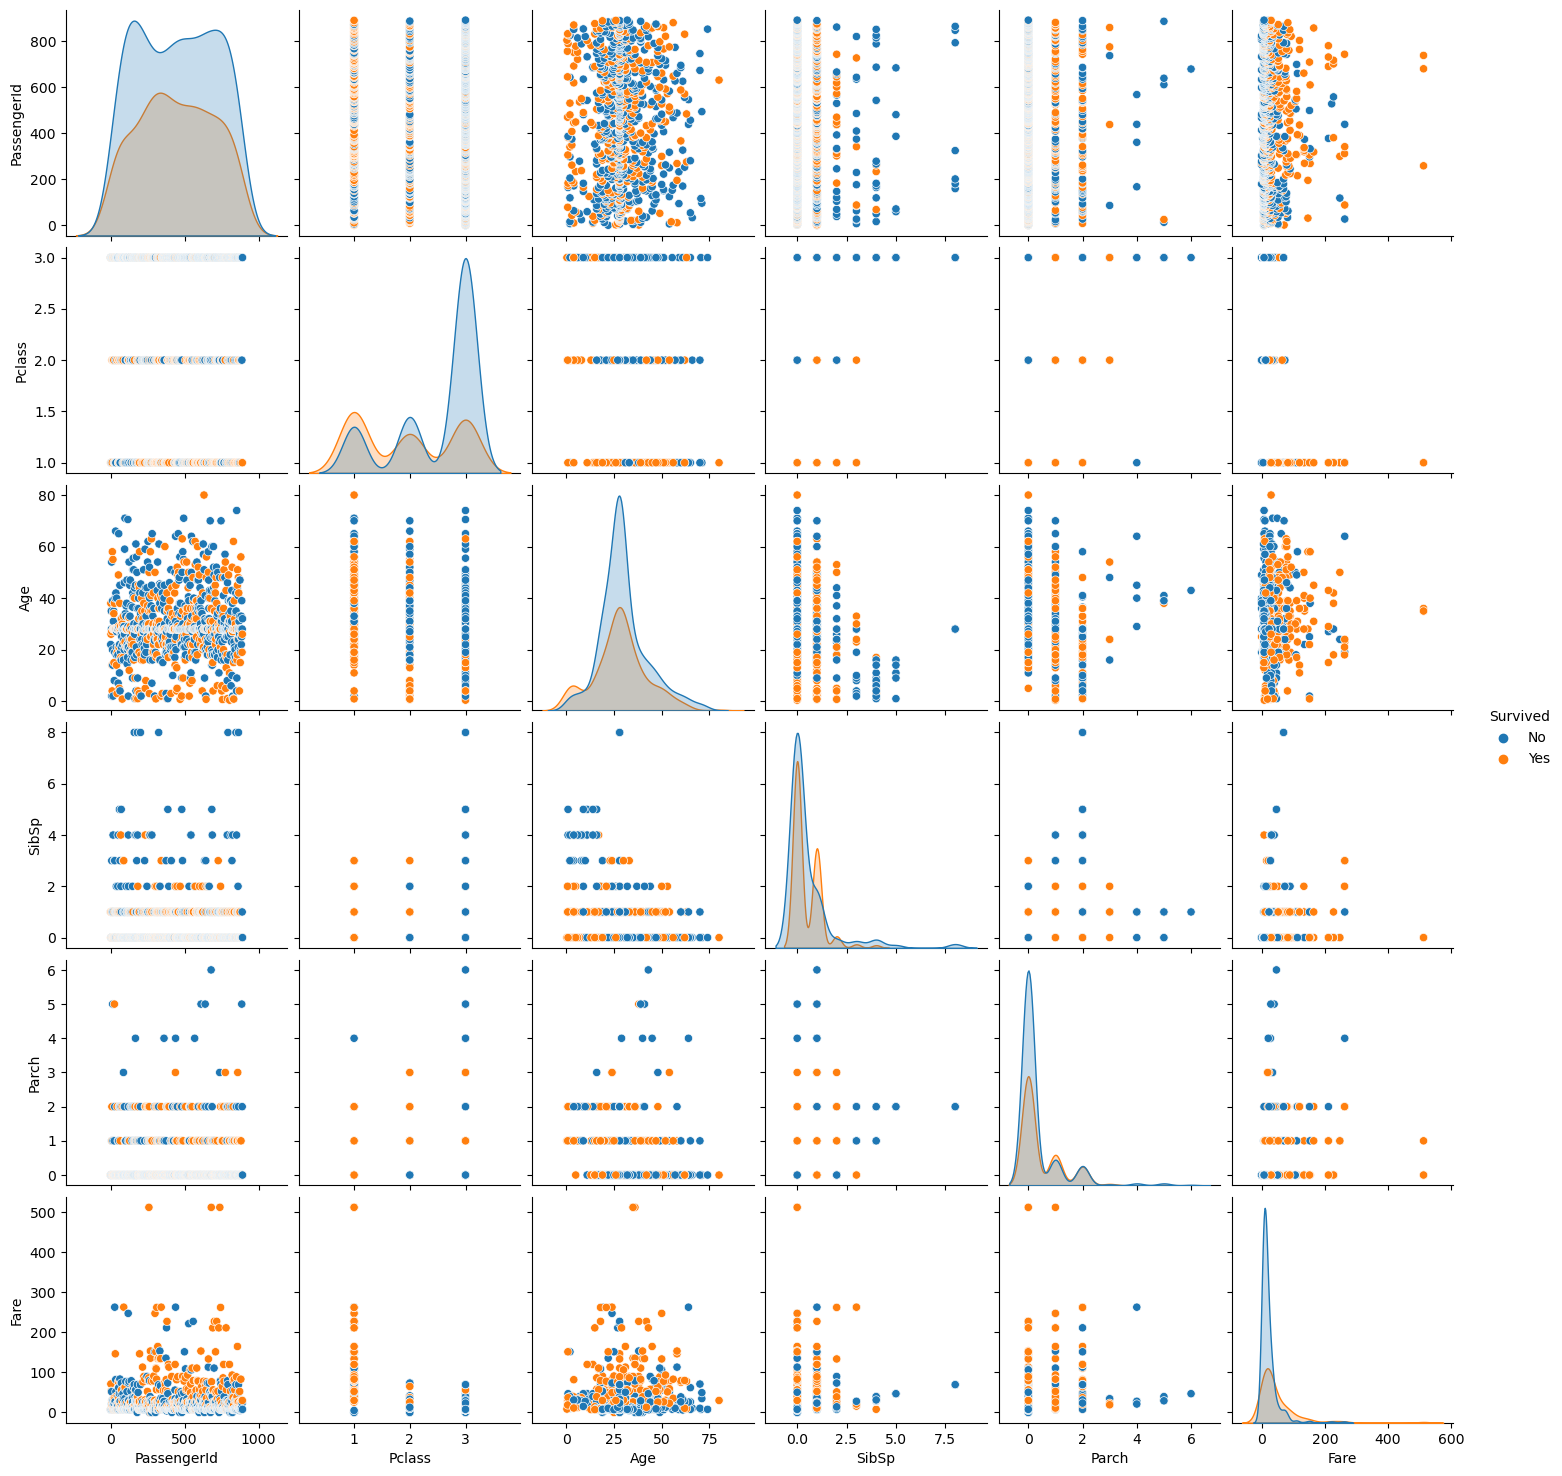

In [91]:
sns.pairplot(df , hue="Survived")

In [93]:
corr= df.corr(numeric_only=True)

<Axes: >

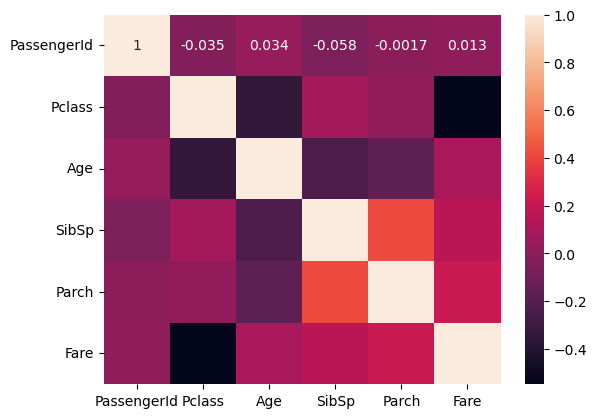

In [103]:
sns.heatmap(corr, annot=True)

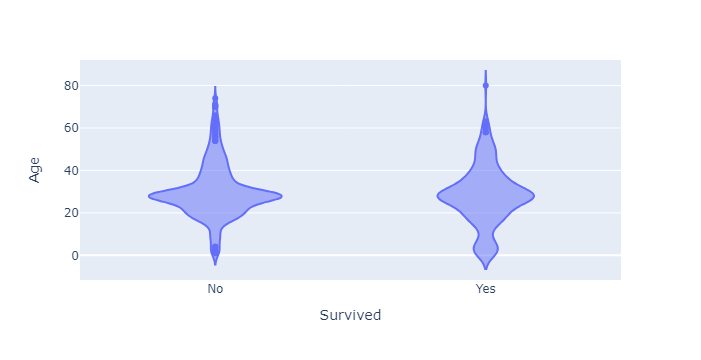

In [99]:
fig = px.violin(df, y="Age", x="Survived")
fig.show()


# Conclusion

In [104]:
# Type Here 
##Done DS project